**Amaç:** MSE değerini min yapacak şekilde katsayılar ya da karar kuralları bulmak.

- Gerçek değerlerle modelin yaptığı tahminler arasındaki fark yani artıklar dikkate alınarak, bu hataları düzeltmeye yönelik yeni modeller kurulur.
- Bu işlem, her yeni modelin bir öncekinin hatalarını öğrenmesi prensibiyle ilerler.
- Bu şekilde oluşturulan modellerin birleşimiyle nihai tahmin yapılır.
- GBM (Gradient Boosting Machine) yöntemi de bu mantıkla çalışan, aşamalı olarak öğrenen ve hataları minimize etmeye çalışan bir topluluk (ensemble) modelidir.
- Gradient descent algoritmasını kullanır.(Boosting + gradient descent)

#### **------>** Boosting yöntemleri, zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_csv("../Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division" , "NewLeague" ,"Salary"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
y_pred = gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_test, y_pred))

239.85845577078845

In [7]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100, 200, 500],
              "subsample": [1, 0.5, 0.8],
              "loss": ["ls", "lad", "quantile"]}



In [10]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv= 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

In [9]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'quantile',
 'max_depth': 8,
 'n_estimators': 500,
 'subsample': 0.5}

In [12]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1, loss = "quantile", max_depth = 8, n_estimators = 500, subsample = 0.5).fit(X_train, y_train)

In [15]:
y_pred = gbm_tuned.predict(X_test)

In [17]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

283.92324918431757

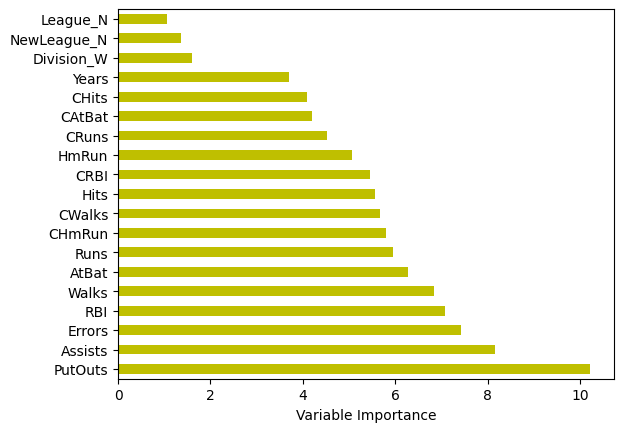

In [19]:
#degisken onem duzeyleri kontrolu
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending=False).plot(kind = "barh", color = "y")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None
